<h1> projet de machine learning : Secure DNS dataset <h1/>
<h3>réalisé par : aymen skiken & malek jellali </h3>

<h1> 1. Présentation du thème et de dataset  </h1>
Ce dataset est destiné à l'analyse du trafic DNS, notamment en ce qui concerne l'utilisation du protocole DNS over HTTPS (DoH). Il peut être utilisé pour comprendre les tendances de trafic DNS, évaluer les performances du réseau et détecter des anomalies potentielles..


Voici une brève description de certaines des colonnes clés de votre ensemble de données :

SourceIP et DestinationIP : Ces colonnes représentent les adresses IP de l'expéditeur et du destinataire de la requête ou de la réponse DNS.
SourcePort et DestinationPort : Ces colonnes représentent les ports réseau utilisés par l'expéditeur et le destinataire.
TimeStamp : Cette colonne représente le moment où la requête ou la réponse DNS a été envoyée.
Duration : Cette colonne représente la durée de la requête ou de la réponse DNS.
FlowBytesSent et FlowBytesReceived : Ces colonnes représentent le nombre d'octets envoyés et reçus pendant la requête ou la réponse DNS.
FlowSentRate et FlowReceivedRate : Ces colonnes représentent le taux auquel les octets ont été envoyés et reçus.
ResponseTimeTimeVariance, ResponseTimeTimeStandardDeviation, ResponseTimeTimeMean, ResponseTimeTimeMedian, ResponseTimeTimeMode, ResponseTimeTimeSkewFromMedian, ResponseTimeTimeSkewFromMode, ResponseTimeTimeCoefficientofVariation : Ces colonnes fournissent diverses mesures statistiques sur le temps de réponse des requêtes ou des réponses DNS.
DoH : Cette colonne indique si la requête ou la réponse DNS a été envoyée via HTTPS (True) ou non (False).

<h3>Source :</h3>
ces mesures dan le dataset sont réalisés en utilisant google chrome browser's DOH meter (DNS over HTTPS traffic on a network)
on a obtenu ce dataset de kaggle https://www.kaggle.com/datasets/peterfriedrich1/dns-test-traffic-dohbrw2020 

Article original : Mohammadreza MontazeriShatoori, Logan Davidson, Gurdip Kaur et Arash Habibi Lashkari, « Détection des tunnels DoH à l'aide de la classification en séries chronologiques du trafic chiffré », 5e Congrès de cyberscience et technologie de l'IEEE, Calgary, Canada, août 2020.

Institut canadien pour la cybersécurité (CIC)C)
<h3>Année :</h3>
L'année de publication ou de mise à disposition de la base de données esaoût 202020202i.

<h3>Objectif d'etudes : </h3>
Prédiction de de la durée des requetes ou réponses DNS

# Exploration des données


In [5]:
import pandas as pd


In [6]:
df=pd.read_csv("benign-chrome.csv")

In [7]:
df.shape

(545464, 35)

In [8]:
df.head()

,SourceIP,DestinationIP,SourcePort,DestinationPort,TimeStamp,Duration,FlowBytesSent,FlowSentRate,FlowBytesReceived,FlowReceivedRate,...,PacketTimeCoefficientofVariation,ResponseTimeTimeVariance,ResponseTimeTimeStandardDeviation,ResponseTimeTimeMean,ResponseTimeTimeMedian,ResponseTimeTimeMode,ResponseTimeTimeSkewFromMedian,ResponseTimeTimeSkewFromMode,ResponseTimeTimeCoefficientofVariation,DoH
0,72.21.91.42,192.168.20.191,443,51041,2020-01-14 15:49:01,4.544040,11256331,2.477164e+06,159324,35062.191354,...,0.580949,1.107852e-07,0.000333,0.000027,0.000016,0.000014,0.096659,0.038228,12.454823,False
1,192.168.20.191,195.201.169.48,51043,443,2020-01-14 15:49:03,8.171041,930,1.138166e+02,11936,1460.768585,...,1.745138,3.224052e+00,1.795565,0.886579,0.103698,0.000900,1.308024,0.493259,2.025273,False
2,192.168.20.191,96.17.115.57,51021,443,2020-01-14 15:49:03,0.033776,162,4.796305e+03,138,4085.741355,...,0.500002,0.000000e+00,0.000000,0.033683,0.033683,0.033683,-10.000000,-10.000000,0.000000,False
3,192.168.20.191,96.114.14.140,50308,443,2020-01-14 15:49:03,0.060723,108,1.778568e+03,120,1976.186947,...,0.577350,0.000000e+00,0.000000,0.060687,0.060687,0.060687,-10.000000,-10.000000,0.000000,False
4,192.168.20.191,23.78.199.198,50983,443,2020-01-14 15:49:03,0.019545,55,2.814019e+03,66,3376.822717,...,1.000000,0.000000e+00,0.000000,0.019545,0.019545,0.019545,-10.000000,-10.000000,0.000000,False


In [9]:
df.drop(["SourceIP","DestinationIP","SourcePort","DestinationPort","TimeStamp"],axis=1).corr()

,Duration,FlowBytesSent,FlowSentRate,FlowBytesReceived,FlowReceivedRate,PacketLengthVariance,PacketLengthStandardDeviation,PacketLengthMean,PacketLengthMedian,PacketLengthMode,...,PacketTimeCoefficientofVariation,ResponseTimeTimeVariance,ResponseTimeTimeStandardDeviation,ResponseTimeTimeMean,ResponseTimeTimeMedian,ResponseTimeTimeMode,ResponseTimeTimeSkewFromMedian,ResponseTimeTimeSkewFromMode,ResponseTimeTimeCoefficientofVariation,DoH
Duration,1.000000,0.074183,-0.020417,0.052128,-0.066427,0.031723,0.065205,0.068693,0.069056,0.071739,...,0.122112,0.219732,0.247940,0.188299,0.086392,0.036916,0.365075,0.348426,0.203238,0.127076
FlowBytesSent,0.074183,1.000000,0.019581,0.313322,0.091377,0.192727,0.136923,0.137854,0.124109,0.105650,...,-0.008796,0.003558,0.013780,0.000956,-0.004291,-0.002635,0.074121,0.062910,0.191998,0.050492
FlowSentRate,-0.020417,0.019581,1.000000,0.002046,0.302000,0.001867,-0.006138,-0.002485,0.003199,0.000853,...,-0.010569,-0.005478,-0.012551,-0.013243,-0.002977,-0.012537,-0.015213,-0.009962,-0.002261,-0.002194
FlowBytesReceived,0.052128,0.313322,0.002046,1.000000,0.333809,0.072127,0.143150,0.269791,0.330533,0.265261,...,-0.031892,-0.004494,0.004352,-0.009795,-0.007666,-0.004482,0.096046,0.070238,0.408966,-0.003240
FlowReceivedRate,-0.066427,0.091377,0.302000,0.333809,1.000000,0.086804,0.182061,0.312625,0.361629,0.305890,...,-0.138268,-0.019338,-0.027878,-0.024167,-0.012547,-0.008105,0.116190,0.087068,0.184386,-0.013112
PacketLengthVariance,0.031723,0.192727,0.001867,0.072127,0.086804,1.000000,0.644211,0.475998,0.235895,0.261507,...,0.057309,0.028010,0.066047,0.023363,-0.010921,-0.007754,0.289027,0.276856,0.207726,-0.016796
PacketLengthStandardDeviation,0.065205,0.136923,-0.006138,0.143150,0.182061,0.644211,1.000000,0.880243,0.479003,0.521612,...,0.147617,0.075073,0.158480,0.065530,-0.023677,-0.016337,0.695640,0.676141,0.438908,-0.014861
PacketLengthMean,0.068693,0.137854,-0.002485,0.269791,0.312625,0.475998,0.880243,1.000000,0.803712,0.795528,...,0.117077,0.053541,0.127563,0.034291,-0.026229,-0.018373,0.622133,0.566615,0.567046,-0.027112
PacketLengthMedian,0.069056,0.124109,0.003199,0.330533,0.361629,0.235895,0.479003,0.803712,1.000000,0.840233,...,0.045284,0.011377,0.050304,-0.012935,-0.021475,-0.014284,0.331533,0.249254,0.542441,-0.020923
PacketLengthMode,0.071739,0.105650,0.000853,0.265261,0.305890,0.261507,0.521612,0.795528,0.840233,1.000000,...,0.049603,0.013814,0.055084,-0.010115,-0.021634,-0.015452,0.350203,0.265562,0.509540,-0.027686


# Prétraitement des Données :

On décide de choisir les colonnes medianes afin de réduire la redondance , et on a éliminé les colonnes "SourceIP","SourcePort","DestinationPort","TimeStamp" pour simplifier la création du modéle

In [10]:
concat_side=df.filter(regex=r'/*Median/*')
df=pd.concat([df[["DestinationIP","Duration"]],concat_side],axis=1)

Après avoir effectué l'encodage one-hot des adresses IP de destination, les colonnes résultantes ont été converties en valeurs entières pour simplifier le traitement des données et réduire la dimensionnalité

In [11]:
# ohe the destinationIP
def ohe_destIP(df):
    # Perform one-hot encoding
    df = pd.concat([df, pd.get_dummies(df['DestinationIP'], prefix='DestIP')], axis=1)
    df = df.drop('DestinationIP', axis=1)
    
    # Convert boolean column to int
    for col_name in df.keys():
        if col_name[:len("DestIP")]=="DestIP":
            df[col_name] = df[col_name].astype(int)
    return df

on a sélectionné 20 000 lignes de l'ensemble de données pour pouvoir charger une partie importante de la table en mémoire

In [12]:
model_df=ohe_destIP(df[:20000])
model_df

,Duration,PacketLengthMedian,PacketLengthSkewFromMedian,PacketTimeMedian,PacketTimeSkewFromMedian,ResponseTimeTimeMedian,ResponseTimeTimeSkewFromMedian,DestIP_1.201.138.254,DestIP_100.26.114.190,DestIP_101.37.178.168,...,DestIP_99.84.194.71,DestIP_99.84.194.76,DestIP_99.84.194.8,DestIP_99.84.194.95,DestIP_99.84.194.97,DestIP_99.84.197.212,DestIP_99.84.201.127,DestIP_99.84.201.140,DestIP_99.84.201.99,DestIP_99.84.206.171
0,4.544040,1514.0,-1.868316,2.246046,0.026351,0.000016,0.096659,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8.171041,328.0,1.589474,0.212176,1.485200,0.103698,1.308024,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.033776,54.0,1.936492,0.033684,-1.491488,0.033683,-10.000000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.060723,57.0,0.000000,0.060687,-1.730700,0.060687,-10.000000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.019545,60.5,0.000000,0.009772,0.000000,0.019545,-10.000000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,0.025044,60.5,0.000000,0.012522,0.000000,0.025044,-10.000000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19996,0.015095,60.5,0.000000,0.007548,0.000000,0.015095,-10.000000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19997,0.015212,60.5,0.000000,0.007606,0.000000,0.015212,-10.000000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19998,0.026886,60.5,0.000000,0.013443,0.000000,0.026886,-10.000000,0,0,0,...,0,0,0,0,0,0,0,0,0,0


création  du  modèle et ajuster les données

In [13]:
nan_list=model_df.isnull().sum()
print(nan_list[nan_list>0])
model_df.dropna(inplace=True)

ResponseTimeTimeMedian            141
ResponseTimeTimeSkewFromMedian    141
dtype: int64


In [14]:
import numpy as np
from sklearn.model_selection import train_test_split

In [15]:
X = np.array(model_df.drop("Duration",axis=1))  # input data
y = np.array(model_df[["Duration"]])  # output data


In [17]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Créer une instance de PCA
pca_model = PCA(n_components=0.99)

# Normaliser les données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Adapter PCA sur vos données normalisées
X_pca = pca_model.fit_transform(X_scaled)


Dans cette étape, nous avons utilisé la bibliothèque scikit-learn (sklearn) pour effectuer une analyse en composantes principales (PCA) sur nos données. Tout d'abord, nous avons importé les classes nécessaires, à savoir PCA et StandardScaler, qui sont utilisées respectivement pour la réduction de dimensionnalité et la normalisation des données.

Ensuite, nous avons créé une instance de PCA en spécifiant le paramètre 'n_components' à 0.99, ce qui signifie que nous souhaitons conserver 99% de la variance totale des données après réduction de dimensionnalité. Cette valeur peut être ajustée en fonction des besoins spécifiques du projet.

Après cela, nous avons normalisé les données en utilisant StandardScaler pour garantir que chaque caractéristique ait une moyenne nulle et une variance unitaire. Cela est nécessaire pour que PCA fonctionne correctement, car il est sensible à l'échelle des caractéristiques.

Enfin, nous avons adapté le modèle PCA aux données normalisées en utilisant la méthode 'fit_transform'. Cela a transformé nos données originales en un nouvel ensemble de données de dimensions réduites (X_pca) tout en conservant autant de variance que possible, conformément au paramètre spécifié précédemment.

In [18]:
from sklearn.model_selection import train_test_split

# Fractionner les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2)


Dans cette étape, nous avons utilisé `train_test_split` de scikit-learn pour séparer nos données en ensembles d'entraînement et de test. En spécifiant `test_size=0.2`, nous avons réservé 20% des données pour le test et 80% pour l'entraînement. Les variables `X_train`, `X_test`, `y_train`, et `y_test` contiennent respectivement les données d'entraînement et de test pour les caractéristiques et les étiquettes.

In [19]:
pip install xgboost



[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: C:\Users\jellali malek\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip


In [20]:
import xgboost as xgb
reg = xgb.XGBRegressor()
reg.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [21]:
import matplotlib.pyplot as plt

def plot_predicted_vs_real(y_true, y_pred):
    plt.figure(figsize=(8, 8))
    plt.scatter(y_true, y_pred, alpha=0.5)
    plt.xlabel('Real Output')
    plt.ylabel('Predicted Output')
    plt.title('Predicted vs. Real Output')
    
    # Plot a diagonal line for reference
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'k--')
    plt.show()


predicted vs. real data 

Model MSE: 48.79654815303989
Model score: 0.8244470394187775


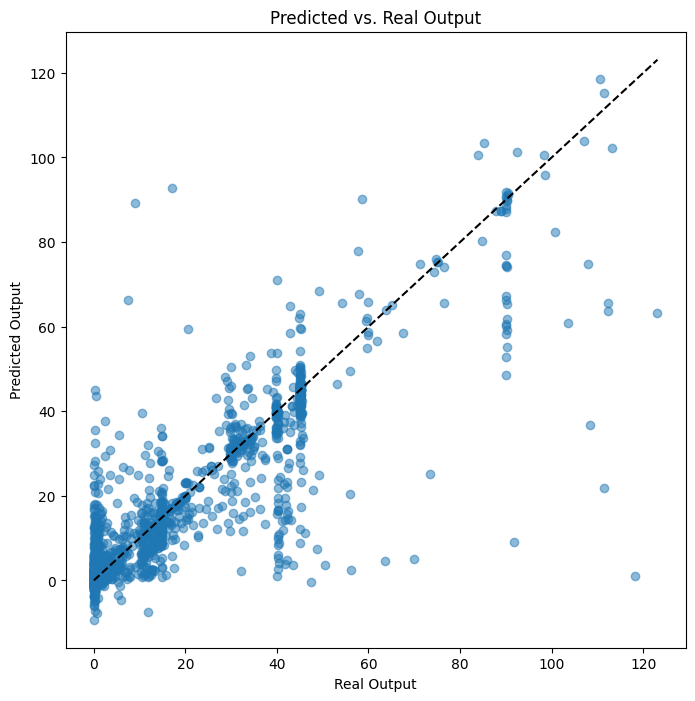

In [22]:
from sklearn.metrics import mean_squared_error
# print(f"Model score: {reg.score(X_test, y_test)}")
y_pred=reg.predict(X_test)
print(f"Model MSE: {mean_squared_error(y_test, y_pred)}")
print(f"Model score: {reg.score(X_test, y_test)}")
plot_predicted_vs_real(y_test, y_pred)

# Neural network 

In [27]:
import matplotlib.pyplot as plt

def plot_loss(loss, val_loss):

    print("Loss: ", loss[-1])
    print("Validation Loss: ", val_loss[-1])
    
    epochs = range(1, len(loss) + 1)

    plt.plot(epochs, loss, 'b', label='Training Loss')
    plt.plot(epochs, val_loss, 'r', label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()


cette fonction permet de visualiser graphiquement les performances d'un modèle en termes de perte d'entraînement et de perte de validation au fil des époques, ce qui est utile pour évaluer la convergence et la généralisation du modèle.

In [29]:
pip install tensorflow


     ---------------------------------------- 0.0/46.2 kB ? eta -:--:--
     ---------------------------------------- 0.0/46.2 kB ? eta -:--:--
     ---------------------------------------- 46.2/46.2 kB 2.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/376.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/376.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/376.9 MB 667.8 kB/s eta 0:09:25
   ---------------------------------------- 0.1/376.9 MB 660.6 kB/s eta 0:09:31
   ---------------------------------------- 0.1/376.9 MB 656.4 kB/s eta 0:09:35
   ---------------------------------------- 0.1/376.9 MB 658.7 kB/s eta 0:09:33
   ---------------------------------------- 0.2/376.9 MB 655.4 kB/s eta 0:09:35
   ---------------------------------------- 0.2/376.9 MB 726.5 kB/s eta 0:08:39
   ---------------------------------------- 0.3/376.9 MB 749.3 kB/s eta 0:08:23
   ---------------------------------------- 0.3/376.9 MB 708.9 kB/s eta 0:


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: C:\Users\jellali malek\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip


In [30]:
from tensorflow.keras import Sequential, layers # type: ignore
from tensorflow.keras.optimizers import Adam # type: ignore

def create_nn_model(input_shape, lr):    
    model = Sequential()
    model.add(layers.Dense(64, activation='relu', input_shape=(input_shape,)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    
    model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=lr))
    return model

model = create_nn_model(X_train.shape[1], 0.0001)
hist = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/10


C:\Users\jellali malek\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


497/497 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 305.7365 - val_loss: 273.1966
Epoch 2/10
497/497 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 248.1222 - val_loss: 243.8165
Epoch 3/10
497/497 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 212.4360 - val_loss: 207.2572
Epoch 4/10
497/497 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 153.0715 - val_loss: 173.5866
Epoch 5/10
497/497 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 126.9170 - val_loss: 153.2197
Epoch 6/10
497/497 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 108.6227 - val_loss: 140.6079
Epoch 7/10
497/497 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 92.7758 - val_loss: 132.4263
Epoch 8/10
497/497 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 89.9897 - val_loss: 126.2180
Epoch 9/10
497/497 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 84.8479 - val_loss: 121.7421
Epoch 10/10
497/497 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 79.0229 - val_loss: 118.7346


Dans cette étape, nous avons utilisé la bibliothèque TensorFlow et son module keras pour construire un modèle de réseau de neurones. Tout d'abord, nous avons importé les classes nécessaires, à savoir Sequential pour créer un modèle séquentiel et layers pour ajouter des couches au modèle. De plus, nous avons importé l'optimiseur Adam pour gérer le processus d'optimisation du modèle.

Ensuite, nous avons défini une fonction create_nn_model, qui prend en entrée la forme des données d'entrée (input_shape) et le taux d'apprentissage (lr). À l'intérieur de cette fonction, nous avons créé un modèle séquentiel en ajoutant deux couches denses, chacune avec 64 neurones et une fonction d'activation relu. La première couche dense a également spécifié la forme des données d'entrée. Enfin, nous avons ajouté une couche dense finale avec une seule sortie.

Après avoir construit le modèle, nous l'avons compilé en spécifiant la fonction de perte (mean_squared_error) et l'optimiseur Adam avec le taux d'apprentissage spécifié.

Enfin, nous avons utilisé le modèle pour entraîner nos données en appelant la méthode fit, en fournissant les données d'entraînement, le nombre d'époques d'entraînement, la taille du lot (batch_size), et les données de validation. Le processus d'entraînement a généré un historique (hist) contenant les métriques de perte pour chaque époque, qui peut être utilisé pour évaluer les performances du modèle et diagnostiquer tout problème éventuel.

Loss:  79.56717681884766
Validation Loss:  118.73458099365234


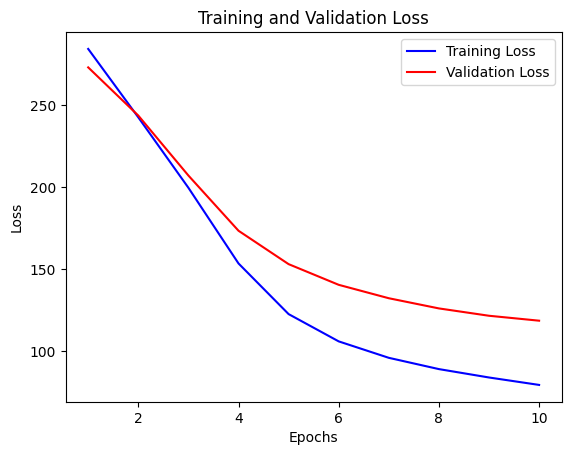

In [31]:
plot_loss(hist.history['loss'], hist.history['val_loss'])
# From the plot we can see there is overfitting

Dans notre cas, la perte de validation est plus élevée que la perte d'entraînement, ce qui suggère qu'il peut y avoir un léger surapprentissage

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


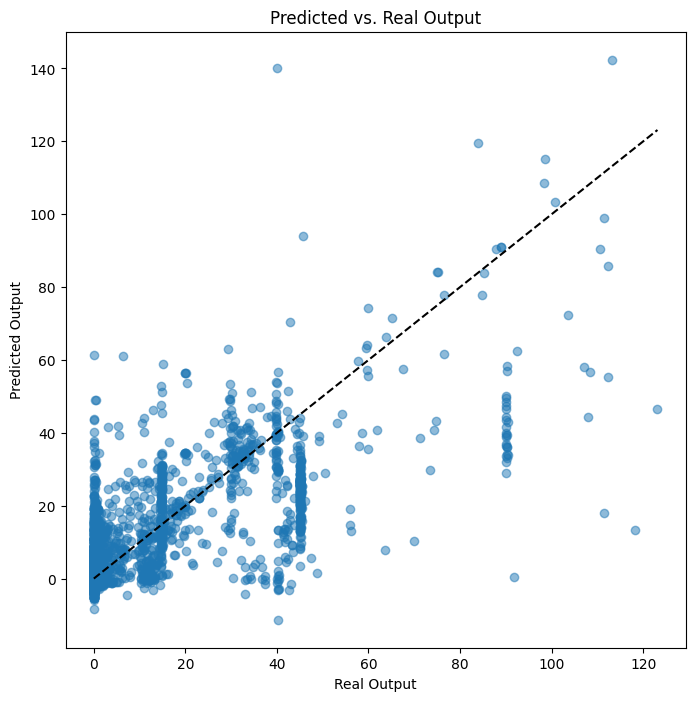

In [32]:
y_pred=model.predict(X_test)
plot_predicted_vs_real(y_test, y_pred)